## Time Series Forecasting

A time series is a sequence of data points collected, recorded, or measured at successive, evenly-spaced time intervals. Each data point represents observations or measurements taken over time, such as stock prices, temperature readings, or sales figures. Time series data is commonly represented graphically with time on the horizontal axis and the variable of interest on the vertical axis, allowing analysts to identify trends, patterns, and changes over time.

**Time-series Forecasting** is the process of using historical data to predict future values in a sequence measured over time. It analyzes past trends, patterns, and seasonality to estimate upcoming outcomes—such as sales, weather, or stock prices.

## Basic to Advanced Time Series Forecasting Models

### 1. Auto Regressive (AR) Model

AR models are the most basic techniques in time-series modelling. AR models use the past values of a time-series to predict future values. The idea is that the current value (to be predicted), is a linear combination of previous values plus an error term.

It is called regression because, just like in typical linear regression our target varaible is expressed as a linear combination of our dependent variable and its called auto, because the regression is applied to the time-series itself.

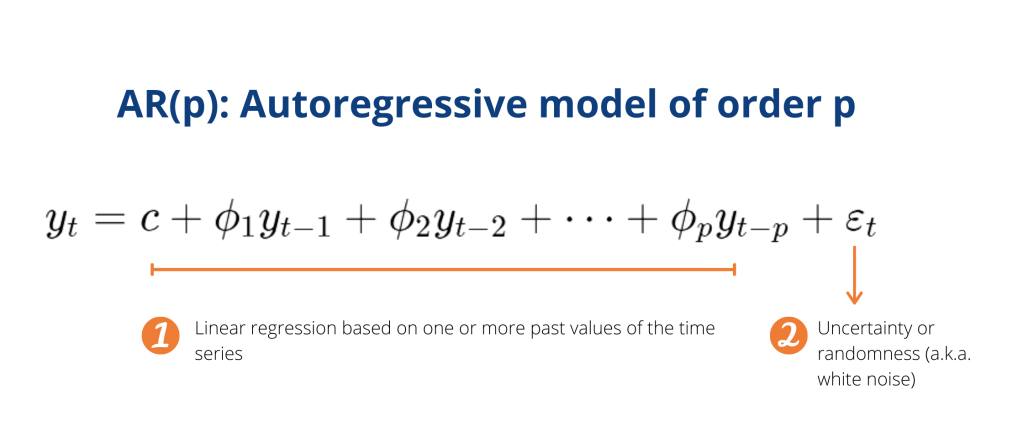

Alright, since the AR model is a linear combination of past values, you have to determine how many time steps to go in the past- this is what we call lag. In short, we need to determine how many past values we should include in the linear combination.

The number of lags, is what we call the order of the AR model. If we have a lag of 2, it means for example, the value of stocks today is influenced by the value of stocks 2 days ago and therefore we say we have an AR model of order 2.

#### Selecting the order (p) of an AR model

##### Introduction to ACF and PACF plots

Autocorrelation calculates the correlation between a time series and a lagged version of itself. The lag is the number of time units to shift the time series. A lag of 1 compares the series with one previous time step. A lag of 2 compares it with the time step before that one. The degree of autocorrelation at a particular lag shows the temporal dependence of the data. Where the autocorrelation is high, there is a strong relationship between the current value and the value at that lag. Where the autocorrelation is low or close to zero it suggests a weak relationship or no relationship at all.

A common approach to visualize autocorrelation is by calculating the autocorrelation function (ACF) or ACF plot that displays the autocorrelation coefficients at different lags.The x-axis represents the lag, and the y-axis represents the autocorrelation values.The shaded area or lines on the plot represent the significance limits (usually a 95% confidence interval). Any bar extending outside these limits is considered statistically significant. Significant peaks or patterns in the ACF plot can reveal the underlying temporal structure of the data. 

In addition, we also have the Partical Autocorrelation Function (PACF) plot. PACF shows us the correlation between a time value and its lagged version after removing the effects of its intermediary time steps. 

**The value of p (order) is the largest lag where the PACF remains statistically significant before cutting off.**


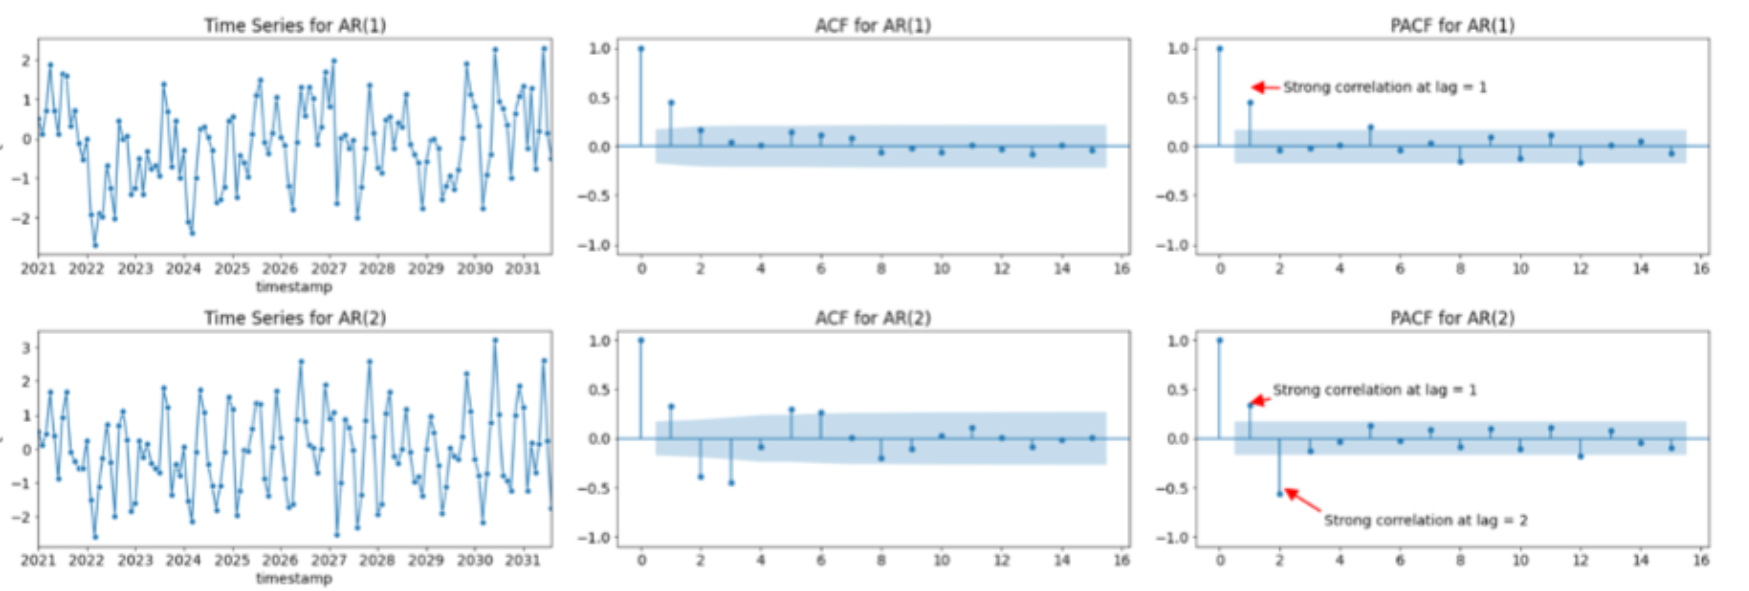

**Question!!**
From the image above, what is the correct order for our AR models? Explain to the rest of the class how you came to this value.

### 2. Moving Average (MA) Model
In Moving Average, the present value of the time series depends on a linear combination of the past error terms (shocks). In a way, MA attempts to learn from the time series previous mistakes. The MA model aggregates these 'shocks' through weights to predict the current value X, at time t. We take the mean of the time series-as a baseline around which fluctuations (the shocks) occur.

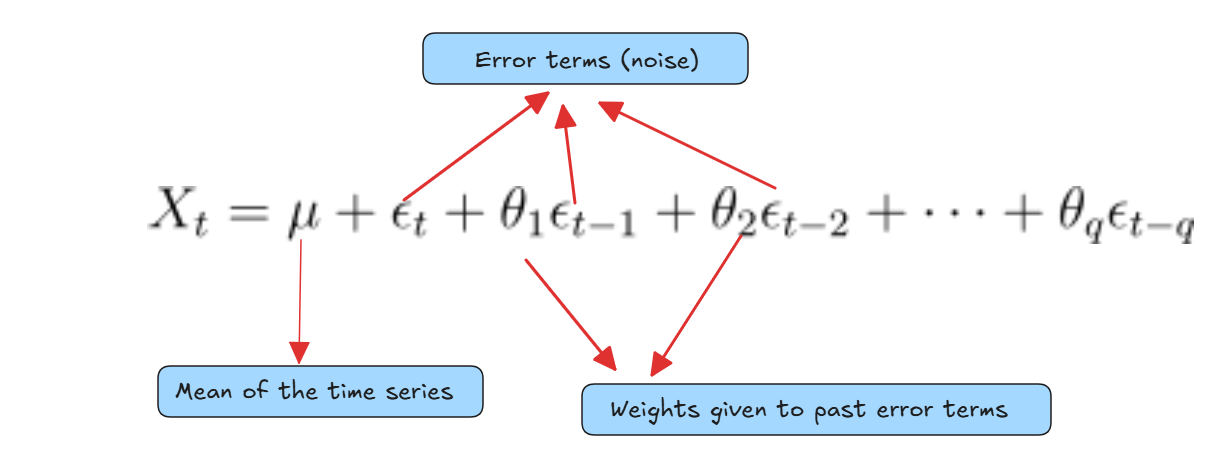

#### Selecting the order (q) of an MA model

**The order of an MA model,𝑞, is selected using the ACF plot**. The value of q is the lag at which the ACF cuts off, meaning the autocorrelations are statistically significant up to lag 𝑞 and insignificant thereafter, while the PACF typically tails off.

### 3. AutoRegressive Moving Average (ARMA) model

For ARMA, you are basically combining AR+MA. The current value of a time series is predicted from the linear combination of both the past values and the past error terms.
To determine the order of an ARMA model, we use the PACF plot to determine the order of the AR component and use the ACF plot to determine the order of the MA component.ARMA helps capture complex patterns by blending past data influences with past forecast errors. 

#### Careful Considerations for modelling time-series data 

- **Stationarity**

A time-series is said to be stationary, when its statistical properties (mean,standard deviation, variance) do not change with time.

 **Why is stationarity important?** Models such as AR,MA and ARMA require the  time-series to be stationary, to make it easier to model. Therefore, before you apply AR,MA or ARMA to your time-series it is important to check for stationarity and then transform the time-series to make it stationary if necessary.

##### How to test for stationarity
There are 2 ways to test for stationarity:
- Visual Inspection
You can intuitively test for stationarity of a time-series by looking out for things like trend, seasonality when plotted. Any time series with trend or seasonality is non-stationary. To build this intuition, lets do a small exercise.

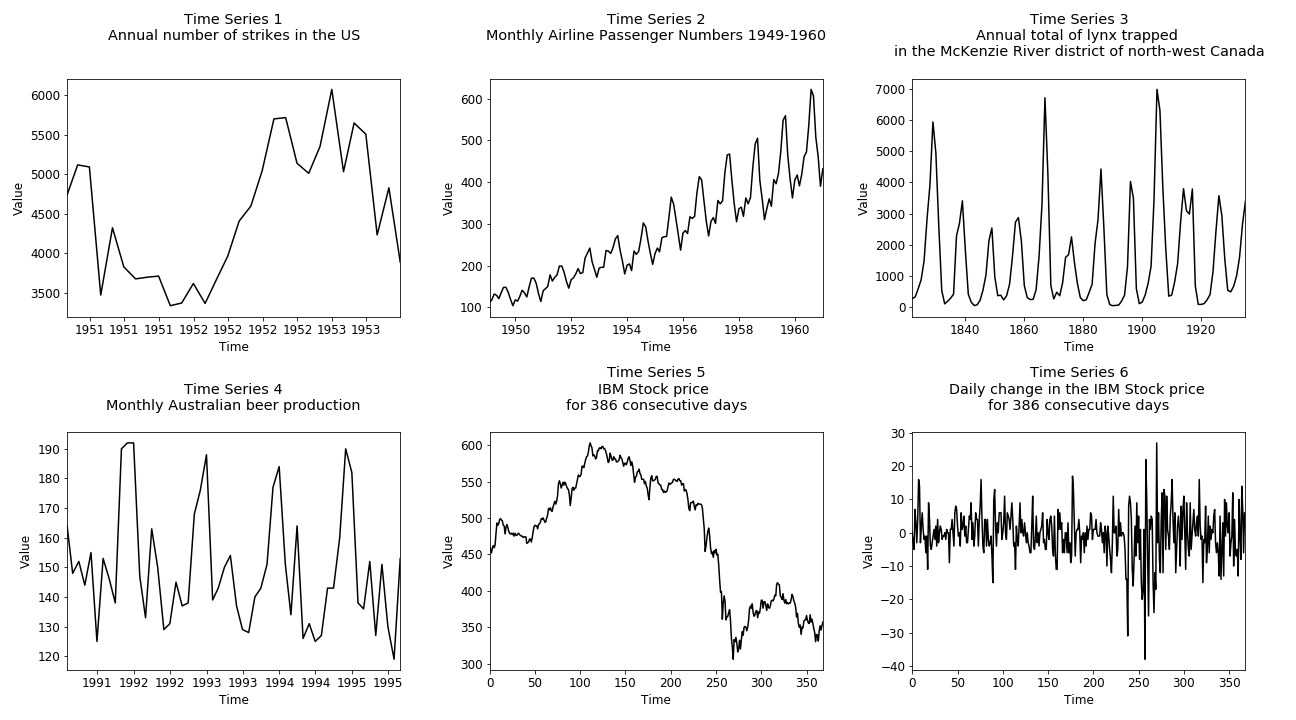


- Augmented Dickey Fuller Test (ADF)

The hypotheses for the Augmented Dickey-Fuller (ADF) test are:
- _Null hypothesis (H0)_: The time series is not stationary because there is a unit root (if p-value > 0.05)
- _Alternative hypothesis (H1)_: The time series is stationary because there is no unit root (if p-value ≤ 0.05)

Using the ADF test, we say a time series is stationary if:

```The p-value (result[1]) ≤ 0.05 and If the test statistic (result[0]) is more extreme than the critical value (result[4]1%, result[4]5%, and result[4]10%)```

Don't worry, the above figures may look foreign, but it will all make sense once we do the full practicum in the coming session.

#### How to make non-stationary data stationary

##### A. Differencing (Most common method)

Differencing calculates the change in value between consecutive time steps. This technique is highly effective for removing trends and seasonality.

$$Y'_t = Y_t - Y_{t-1}$$

Where $Y_t$ is the original series and $Y'_t$ is the differenced series. If the trend is removed, $Y'_t$ should be stationary. If not, a second difference may be applied ($Y''_t = Y'_t - Y'_{t-1}$), though this is rarely needed and can lead to over-differencing.

##### 2. Transformations
Applying a log transformation is the standard way to stabilize variance, especially when the magnitude of the fluctuations increases with the magnitude of the series itself.

$$Y'_t = \ln(Y_t)$$

If the data is also non-stationary in the mean, you would typically apply the log transformation first, and then apply differencing. This is very common in financial modelling.
Also note, there are other transformations to handle non-stationarity due to changing variance such as the Box-Cox power transform. I found this [great article](https://towardsdatascience.com/box-cox-transform-for-time-series-cc45f26082c6/) on how it works, check it out!!


##### 3. Seasonal Differencing
Calculates the difference between consecutive seasons.

### 3. AutoRegressive Integrated Moving Average (ARIMA) Model

ARIMA is made up of 3 components:

- AutoRegressive component
Current value is dependent on a linear combination of past values

- I (Integration)
Differencing the time series to make it stationary

- Moving Average component
-Current value depends on linear combination of past errors

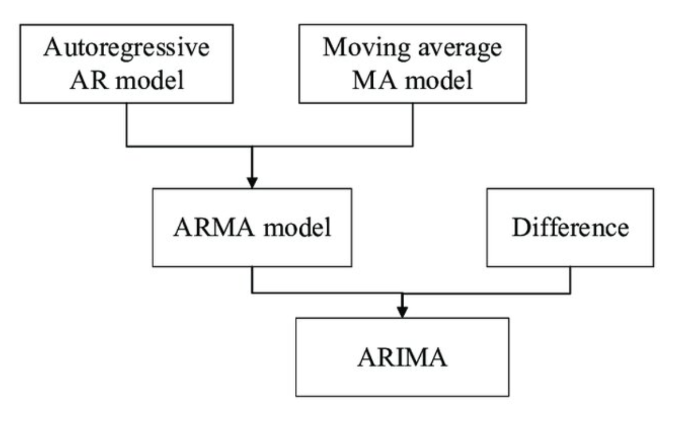

### 4. Seasonal AutoRegressive Integrated Moving Average (SARIMA)

### 5. AutoRegressive Conditional Heteroskedasticity (ARCH) Model

In basic time series models, we often assume that the variance (the spread or volatility) of the errors (or "shocks") is constant over time. This is called homoskedasticity.

However, when we look at financial data (like stock returns), this assumption is often wrong. We see periods of high volatility (large, unpredictable price swings) clustered together, followed by periods of low volatility. This phenomenon is called volatility clustering.

The ARCH model was specifically designed by Robert Engle in 1982 to capture and model this time-varying, non-constant variance, which is called heteroskedasticity.He won the nobel price in Economics for this idea btw!

#### The Main Idea Behind ARCH

The ARCH model's central idea is that the variance of the current error term (or "shock") is dependent on the size of the past squared error terms. This is what "Conditional Heteroskedasticity" means: the variance is conditional on past information.

##### 1. The Time Series Equation (The Mean)

First, we need an equation for the asset's return, $y_t$. The ARCH model doesn't focus on this part, but it's the framework:

$$y_t = \mu_t + \epsilon_t$$

* **$y_t$**: The value we are forecasting (e.g., a stock return) at time $t$.
* **$\mu_t$**: The expected mean return (this is often modeled using a basic ARMA or a constant).
* **$\epsilon_t$**: The error term or shock at time $t$. This is the part whose variance we want to model.

##### 2. The ARCH Equation (The Variance)

This is where the magic happens. We model the conditional variance, $\sigma_t^2$ (the variance of $\epsilon_t$):

$$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \alpha_2 \epsilon_{t-2}^2 + \dots + \alpha_q \epsilon_{t-q}^2$$

* **$\sigma_t^2$**: The conditional variance (our forecast for the volatility) at time $t$.
* **$\alpha_0$**: A constant base level of variance (must be $> 0$).
* **$\epsilon_{t-i}^2$**: The squared error from $i$ periods ago. The squared error acts as a measure of how large the volatility shock was in the past.
* **$\alpha_i$**: The coefficients that tell us how much impact the past squared errors have on the current variance. All $\alpha_i$ must be $\ge 0$ for the variance to be non-negative.
* **$q$**: This is the order of the ARCH model, denoted as ARCH(q). It tells us how many past squared errors we include.

##### Simple ARCH(1) Example

Let's look at the simplest version, **ARCH(1)**:

$$\sigma_t^2 = \alpha_0 + \alpha_1 \epsilon_{t-1}^2$$

##### Interpretation:
1.  If the error yesterday ($\epsilon_{t-1}$) was large (meaning there was a big surprise or volatility shock), then $\epsilon_{t-1}^2$ will also be large.
2.  A large $\epsilon_{t-1}^2$ will, through the coefficient $\alpha_1$, lead to a larger current variance $\sigma_t^2$.
3.  A larger variance $\sigma_t^2$ means we expect today's error $\epsilon_t$ to be more volatile (i.e., we expect bigger swings).



Now, the models used to forecast volatility are quite numerous, there is GARCH, EGARCH, GARCH-M, too many to exhaust during this module.But we will look into practical applications of most of them. Happy learning!!